In [1]:
from collections import defaultdict
from itertools import product

def calc_pdist(pdistlist, maxnode=True):
    pdist = defaultdict(int)
    pdistlist = [pd.items() for pd in pdistlist]
    productdata = product(*pdistlist)
    for data in productdata:
        score, prob = data[0]
        for s, p in data[1:]:
            if maxnode:
                score = max(score, s)
            else:
                score = min(score, s)
            prob *= p
        pdist[score] += prob
    return pdist

In [2]:
from pprint import pprint
from tree import calc_stval

pdistA = {
    -2: 0.05,
    -1: 0.2,
     0: 0.5,
     1: 0.2,
     2: 0.05
}
pdistB = {
    -3: 0.05,
    -2: 0.2,
    -1: 0.5,
     0: 0.2,
     1: 0.05
}
pdistNmax = calc_pdist([pdistA, pdistB], maxnode=True)
pprint(pdistNmax)
print(calc_stval(pdistNmax))

defaultdict(<class 'int'>,
            {-2: 0.012500000000000002,
             -1: 0.17500000000000002,
             0: 0.525,
             1: 0.23750000000000004,
             2: 0.05000000000000001})
(0.13750000000000007, 0.6435937500000002, 0.8022429494860022)


In [3]:
pdistNmin = calc_pdist([pdistA, pdistB], maxnode=False)
pprint(pdistNmin)
print(calc_stval(pdistNmin))

defaultdict(<class 'int'>,
            {-3: 0.05000000000000001,
             -2: 0.23750000000000004,
             -1: 0.525,
             0: 0.17500000000000002,
             1: 0.012500000000000002})
(-1.1375000000000002, 0.6435937500000001, 0.802242949486002)


In [4]:
pdistN3 = calc_pdist([pdistA, pdistB, pdistB], maxnode=True)
pprint(pdistN3)
print(calc_stval(pdistN3))

defaultdict(<class 'int'>,
            {-2: 0.0031250000000000006,
             -1: 0.1375,
             0: 0.5362500000000001,
             1: 0.2731250000000001,
             2: 0.05000000000000002})
(0.22937500000000013, 0.5705121093750002, 0.7553225201031677)


In [5]:
import matplotlib.pyplot as plt
import japanize_matplotlib

def draw_pdist(pdist):
    plt.bar(pdist.keys(), pdist.values(), width=1)
    plt.xlabel("近似値")
    plt.ylabel("確率")

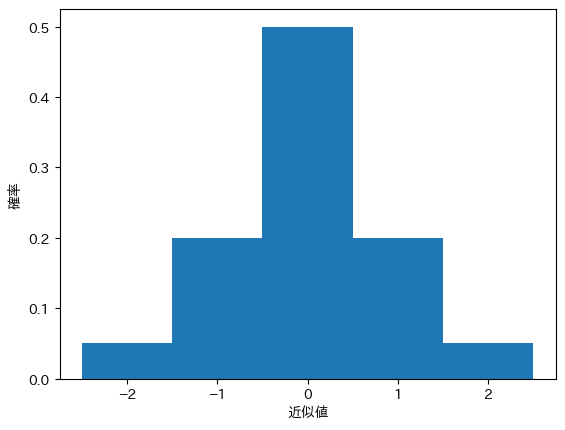

In [6]:
draw_pdist(pdistA)

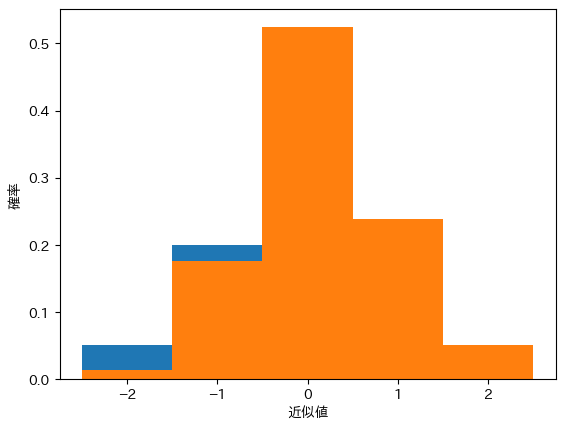

In [7]:
draw_pdist(pdistA)
draw_pdist(pdistNmax)

In [8]:
def draw_pdist(pdist, label, alpha=1.0):
    plt.bar(pdist.keys(), pdist.values(), width=1, label=label, alpha=alpha)
    plt.xlabel("近似値")
    plt.ylabel("確率")
    plt.legend()

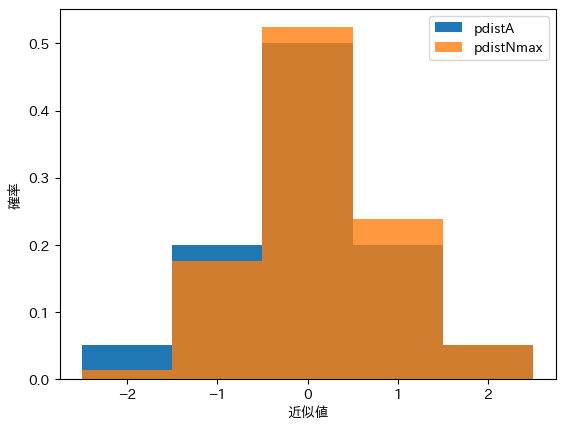

In [9]:
draw_pdist(pdistA, label="pdistA")
draw_pdist(pdistNmax, label="pdistNmax", alpha=0.8)

In [10]:
from statistics import NormalDist

ndist = NormalDist(0, 1)

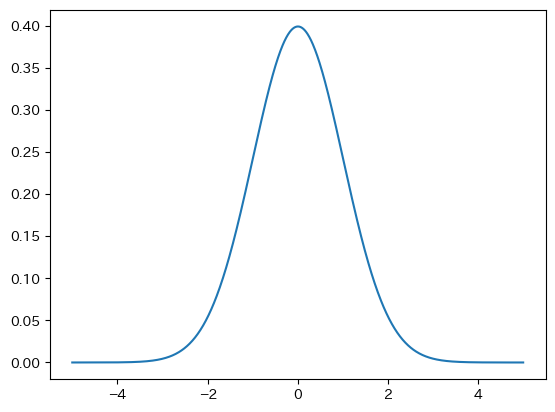

In [11]:
X = [x / 100 for x in range(-500, 500)]
Y = [ndist.pdf(x) for x in X]
plt.plot(X, Y)

([<matplotlib.axis.XTick at 0x260f965e510>,
 [Text(-1.5, 0, 'a'), Text(0.5, 0, 'b')])

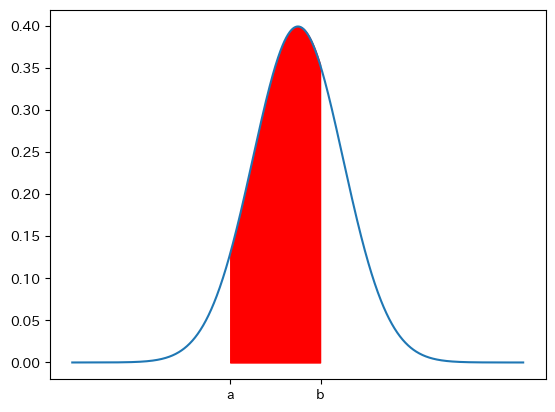

In [12]:
X = [x / 100 for x in range(-500, 500)]
Y = [ndist.pdf(x) for x in X]
plt.plot(X, Y)
plt.fill_between(X[350:550], 0, Y[350:550], color="r")
plt.xticks([-1.5, 0.5], labels=["a", "b"])

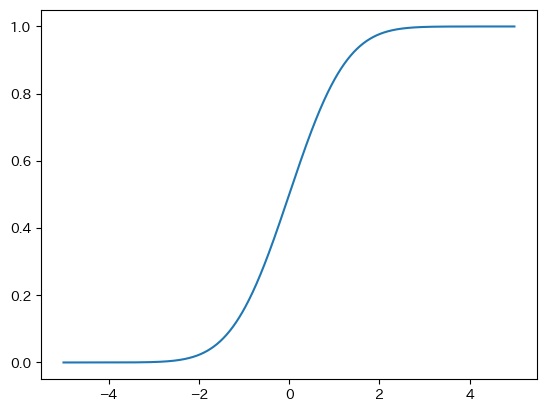

In [13]:
X = [x / 100 for x in range(-500, 500)]
Y = [ndist.cdf(x) for x in X]
plt.plot(X, Y)

In [14]:
def calc_discrete_ndist(m, s, area):
    ndist = NormalDist(m, s)
    pdist = {}
    for x in range(m - area, m + area + 1):
        if x == m - area:
            pdist[x] = ndist.cdf(x + 0.5)
        elif x == m + area:
            pdist[x] = 1 - ndist.cdf(x - 0.5)
        else:
            pdist[x] = ndist.cdf(x + 0.5) - ndist.cdf(x - 0.5)
    return pdist

(1.1102230246251565e-16, 1.0833333223611192, 1.0408329944621852)


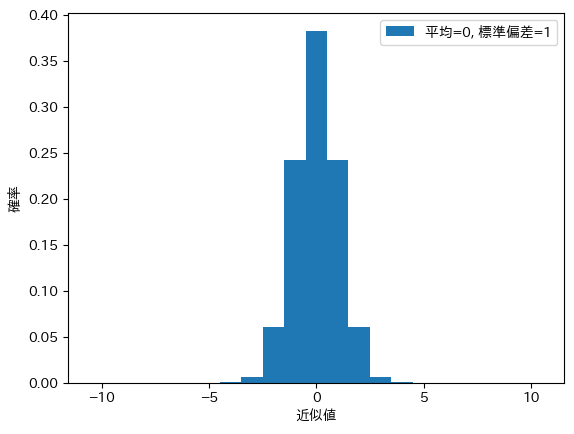

In [15]:
pdist = calc_discrete_ndist(0, 1, 10)
print(calc_stval(pdist))
draw_pdist(pdist, label="平均=0, 標準偏差=1")

(5.0, 23.110961551847346, 4.807386145489807)


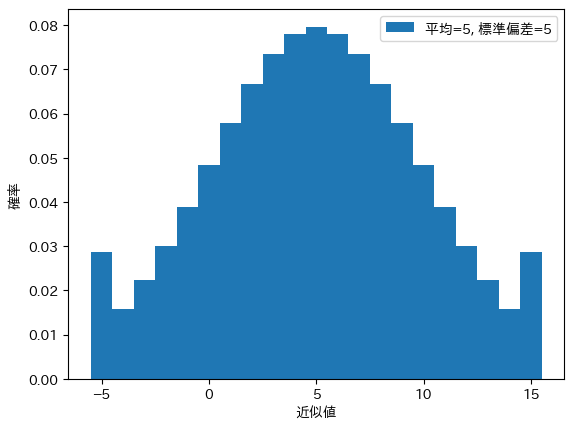

In [16]:
pdist = calc_discrete_ndist(5, 5, 10)
print(calc_stval(pdist))
draw_pdist(pdist, label="平均=5, 標準偏差=5")

(4.999999999999999, 25.08040342281806, 5.008033887946253)


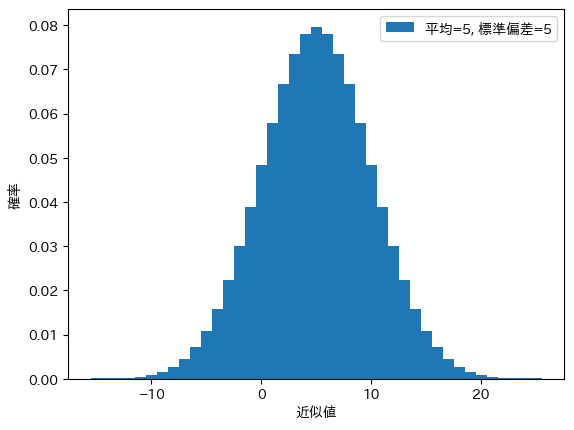

In [17]:
pdist = calc_discrete_ndist(5, 5, 20)
print(calc_stval(pdist))
draw_pdist(pdist, label="平均=5, 標準偏差=5")

(2.349041216719883, 17.213367568249353, 4.148899561118508)


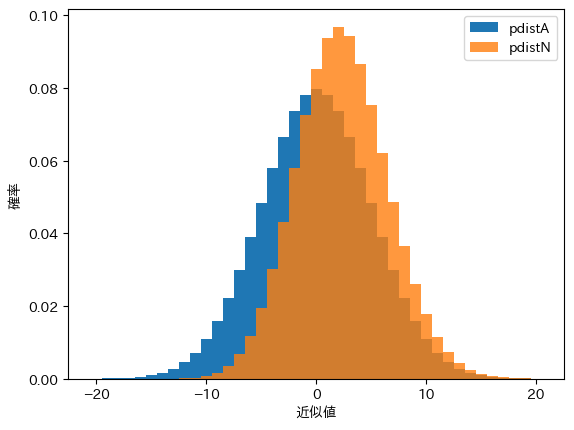

In [18]:
pdistA = calc_discrete_ndist(0, 5, 20)
pdistB = calc_discrete_ndist(-1, 5, 20)
pdistN = calc_pdist([pdistA, pdistB], maxnode=True)
print(calc_stval(pdistN))
draw_pdist(pdistA, label="pdistA")
draw_pdist(pdistN, alpha=0.8, label="pdistN")